# Clasicos y localia

Dateset: https://www.kaggle.com/aimontero/clasicos-arg

El dataset comprende solamente partidos oficiales por el torneo local, y va desde 1933 a 2019.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("/home/nicolasterroni/projects/cursos/curso_ML_udemy/python-ml-course/datasets/clasicos.csv")

In [3]:
data

,local_goals,local_name,match,visitor_goals,visitor_name
0,0,Colon,Superliga 2018/19 - Fecha 4,0,Union
1,1,Union,Superliga 2017/18 - Fecha 17,1,Colon
2,1,Colon,Campeonato 2016/17 - Fecha 24,1,Union
3,0,Union,Campeonato 2016/17 - Fecha 16,2,Colon
4,1,Union,Torneo 2016 - Fecha 12,0,Colon
...,...,...,...,...,...
931,1,Boca Juniors,Campeonato 1933 - Fecha 17,1,River Plate
932,2,Boca Juniors,Campeonato 1932 - Fecha 32,1,River Plate
933,1,River Plate,Campeonato 1932 - Fecha 15,1,Boca Juniors
934,0,River Plate,Campeonato 1931 - Fecha 34,3,Boca Juniors


#### Vamos a agregar las siguientes columnas a partir de estos datos:
- local_won
- local_tie
- local_lose

Seran booleanos que indicaran como le fue al local en el partido

In [4]:
local_won = data['local_goals'] > data['visitor_goals']
local_tie = data['local_goals'] == data['visitor_goals']
local_lose = data['local_goals'] < data['visitor_goals']
data = pd.concat([
    data,
    local_won.rename('local_won'),
    local_tie.rename('local_tie'),
    local_lose.rename('local_lose')
    ],
    axis=1
)
data['local_won'] = data['local_won'].astype(int)
data['local_tie'] = data['local_tie'].astype(int)
data['local_lose'] = data['local_lose'].astype(int)
data

,local_goals,local_name,match,visitor_goals,visitor_name,local_won,local_tie,local_lose
0,0,Colon,Superliga 2018/19 - Fecha 4,0,Union,0,1,0
1,1,Union,Superliga 2017/18 - Fecha 17,1,Colon,0,1,0
2,1,Colon,Campeonato 2016/17 - Fecha 24,1,Union,0,1,0
3,0,Union,Campeonato 2016/17 - Fecha 16,2,Colon,0,0,1
4,1,Union,Torneo 2016 - Fecha 12,0,Colon,1,0,0
...,...,...,...,...,...,...,...,...
931,1,Boca Juniors,Campeonato 1933 - Fecha 17,1,River Plate,0,1,0
932,2,Boca Juniors,Campeonato 1932 - Fecha 32,1,River Plate,1,0,0
933,1,River Plate,Campeonato 1932 - Fecha 15,1,Boca Juniors,0,1,0
934,0,River Plate,Campeonato 1931 - Fecha 34,3,Boca Juniors,0,0,1


## Descripcion de estadisticas basicas de datos numericos

In [5]:
data.describe()

,local_goals,visitor_goals,local_won,local_tie,local_lose
count,936.000000,936.000000,936.000000,936.000000,936.000000
mean,1.477564,1.195513,0.388889,0.352564,0.258547
std,1.259628,1.115386,0.487759,0.478024,0.438070
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000
75%,2.000000,2.000000,1.000000,1.000000,1.000000
max,7.000000,6.000000,1.000000,1.000000,1.000000


In [6]:
# Datos generales
total_matches = data.shape[0]
count_local_won = data['local_won'].value_counts().loc[1]
count_ties = data['local_tie'].value_counts().loc[1]
count_local_lose = data['local_lose'].value_counts().loc[1]

## Equipos

In [7]:
teams = list(set(data['local_name'].values))
teams

['River Plate',
 'Gimnasia (LP)',
 'Newells',
 'Huracan',
 'Rosario Central',
 'Colon',
 'Independiente',
 'Estudiantes (LP)',
 'Racing Club',
 'San Lorenzo',
 'Union',
 'Boca Juniors']

## Partidos jugados como local

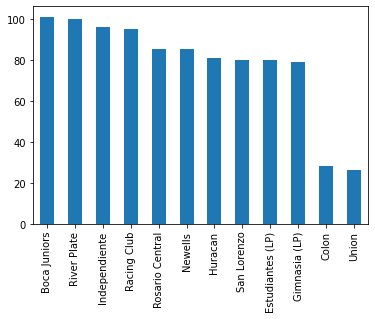

In [8]:
times_played = data['local_name'].value_counts()
ax = times_played.plot.bar(y='Matches',x='Teams')

### Se agrupara cada fila con el criterio de quien jugo como local, diferenciando el resultado de los partidos.
#### Se mostraran en un grafico con misma escala para poder comparar

### Ejemplo: River Plate

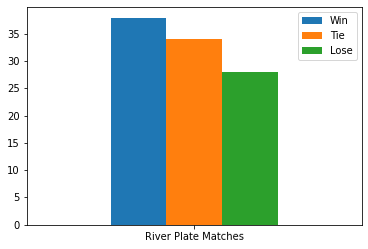

In [9]:
river_local_matches = data.loc[data['local_name'] == "River Plate"]

count_river_local_matches = river_local_matches.shape[0]
river_won_as_local = river_local_matches['local_won'].value_counts().loc[1]
river_tie_as_local = river_local_matches['local_tie'].value_counts().loc[1]
river_lose_as_local = river_local_matches['local_lose'].value_counts().loc[1]

index=['River Plate Matches',]

df = pd.DataFrame({
    'Win': river_won_as_local,
    'Tie': river_tie_as_local,
    'Lose': river_lose_as_local
},index=index)

ax = df.plot.bar(rot=0.1)

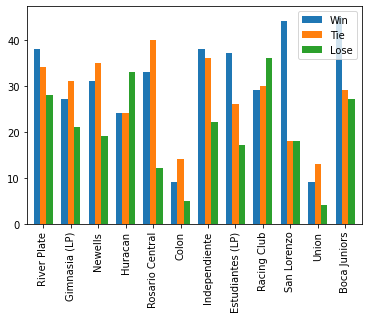

In [10]:
df = pd.DataFrame()
index = []
for team in teams:
    local_matches = data.loc[data['local_name'] == team]

    count_local_matches = local_matches.shape[0]
    won_as_local = local_matches['local_won'].value_counts().loc[1]
    tie_as_local = local_matches['local_tie'].value_counts().loc[1]
    lose_as_local = local_matches['local_lose'].value_counts().loc[1]

    index = [team,]

    dataframe = pd.DataFrame({
        'Win': won_as_local,
        'Tie': tie_as_local,
        'Lose': lose_as_local
    },index=index)
    df = pd.concat([df,dataframe],axis=0)

ax = df.plot.bar(width=0.7,align='center')

## Datos ordenados

In [11]:
df.sort_values(by=['Win'], inplace=True, ascending=False)
df

,Win,Tie,Lose
Boca Juniors,45,29,27
San Lorenzo,44,18,18
River Plate,38,34,28
Independiente,38,36,22
Estudiantes (LP),37,26,17
Rosario Central,33,40,12
Newells,31,35,19
Racing Club,29,30,36
Gimnasia (LP),27,31,21
Huracan,24,24,33


La primer conclusion que podemos sacar es que si bien Boca Juniors es el que mas ha ganado como local, San Lorenzo es el que mas fuerte se hace en su cancha, ya que ha ganado casi la misma cantidad de partidos pero ha perdido y empatado menos.